# Sales information

### Data Analysis to be performed over the gaming dataset:
- Find Top gaming platforms most games developed for a platform
- Top Gamming Genre
- Year with most game releses
- top performing gaming platform by year
- Top performing gaming genre


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.despine()

In [2]:
# import the video game sales CSV in to pandas dataframe.
sales_df = pd.read_csv('video_game_sales.csv')
sales_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


This data set consists of data on games sales and scores. <br>
Every row corresponds to a game. <br>
This dataset also gives information such as Platform, Year Released, Genre, Publisher, Sales in millions.<br>
Other features include: Critc scores, critic count, user score, user count, developer, Rating

Exploring the dataset
- check for null/NaN values.
- check for anomalies like errorneous data entry
- checking the number of rows and columns
- dropping columns which are not needed
- replacing or dropping rows with null/nan value.
- checking the stats of the data set: Mean, Median, Mode, Quartiles etc.

In [3]:
# Dropping non-essential columns.
drop_columns = ['Critic_Score','Critic_Count','User_Count','User_Score','Developer','Rating']
sales_df.drop(drop_columns,inplace=True,axis = 1)

In [4]:
sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
#checking for any null values in the data frame
sales_df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

we can see from the table above that we are having some missing values.<br>
There are 2 things we can do
- Look up for the information online or
- We could drop the rows with missing values
I will be going to drop the rows with missing values <br>
because we can work with the remaining data to perform our Exploratory analysis <br>
And as far as the NaNs in the Developer and Ratings column goes, I am going to fill them as 'unknown'.

In [6]:
# Dropping NaN from Year_of_Release and filling the NaNs with 'Unknown' for developers and ratings.
#dropping rows in Year_of_Release.
sales_df.dropna(how='any', subset=['Year_of_Release','Name'], inplace=True)


In [7]:
sales_df.isnull().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher          32
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
dtype: int64

In [8]:
#dilling the NaN with 'Unknown' in Publisher column 
sales_df[['Publisher']] = sales_df[['Publisher']].fillna('Unkonwn')

In [9]:
sales_df.head()
print(sales_df.isnull().sum())

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64


As you can see above there are no null values in the dataframe.
If we check the Year_of_Releaase column, you can see that the data type looks like a float.

In [10]:
#checking the data type of year_of_release column
print('Before the conversion',sales_df.Year_of_Release.dtypes)
sales_df[['Year_of_Release']] = sales_df[['Year_of_Release']].astype(int, inplace = True)

print('After typecasting',sales_df.Year_of_Release.dtypes)

Before the conversion float64
After typecasting int32


In [11]:
#Now lets check for any errorneous entry in thpe Year_of_Release
print('Maximum Year', sales_df.Year_of_Release.max())
print('Minimum Year', sales_df.Year_of_Release.min())

Maximum Year 2020
Minimum Year 1980


As we can see 2020 is clearly an error. <br>
We can solve this by checking the information online.

In [12]:
sales_df.loc[sales_df['Year_of_Release'] == 2020 ]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


Here you can see the row with the errorneous Year entry <br>
just doing a quick google search on the game will give us the correct info which is 2009.

In [13]:
#updating with the correct year.
sales_df['Year_of_Release'] = sales_df['Year_of_Release'].replace(2020.0, 2009.0)
print(sales_df.loc[sales_df['Name'] == 'Imagine:Makeup Artist'])
print(sales_df.head())

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.36     28.96      3.77         8.45         82.53  
1     29.08      3.58      6.81         0.77         40.24  
2     15.68     12.76      3.79         3.29         35.52  
3     15.61     10.93      3.28         2.95         32.77  
4     11.27      8.89     10.22         1.00         31.37  


Let us check the description of the Dataframe.<br>
number of games, publisher, developers, etc. just to check the distribution of the data.

In [14]:
# Checking the how the data is distributed
print('The total number of Games: ',len(sales_df))
platform = sales_df['Platform'].unique()
print('The total number of Platforms: ', len(platform))
genre = sales_df['Genre'].unique()
print('The total number of Genres: ', len(genre))
publisher = sales_df['Publisher'].unique()
print('The total number of Publishers: ', len(publisher))

The total number of Games:  16448
The total number of Platforms:  31
The total number of Genres:  12
The total number of Publishers:  580


### Performing analysis over the dataset to pull out insights like :
- Total global sales per year
- Sales per publisher per year
- Year with most game releses
- top performing gaming platform by year
- Top performing gaming genre

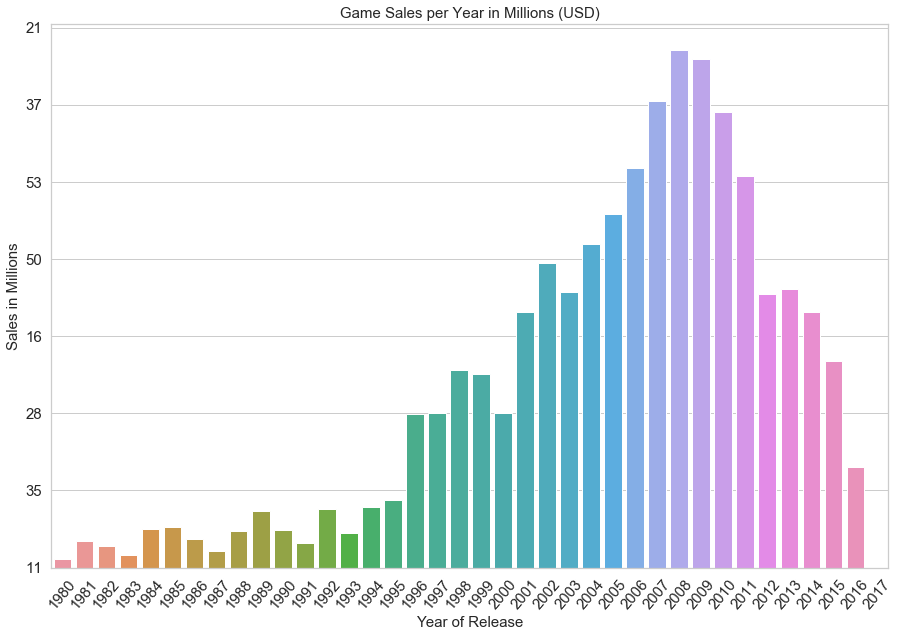

In [34]:
# Bar chart to display the number of games developed per year
''' creating a subset of sales_df, grouping by Year_of_Release to get 
the total sum of games developed each year. 
The y-axis = Total Global_Sales per year
The x-axis = Year_of_Release passed as an index.
'''

y = sales_df.groupby(['Year_of_Release']).sum().astype(int)
y = y['Global_Sales']
x = y.index.astype(int)

#creating a figure for the graph.
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax1 = sns.barplot(x=x, y=y, orient='v')
ax1.set_title('Game Sales per Year in Millions (USD)', fontsize=15)
ax1.set_xlabel(xlabel = 'Year of Release', fontsize=15)
ax1.set_yticklabels(labels=y, fontsize=15, rotation=0)
ax1.set_xticklabels(labels=x, fontsize=15, rotation=50)
ax1.set_ylabel(ylabel = 'Sales in Millions', fontsize= 15)
plt.show()

- we can see from the graph above that there was an increase in the total global sales of games from 1996 and then it goes up from there, peaking at its highest in 2008.

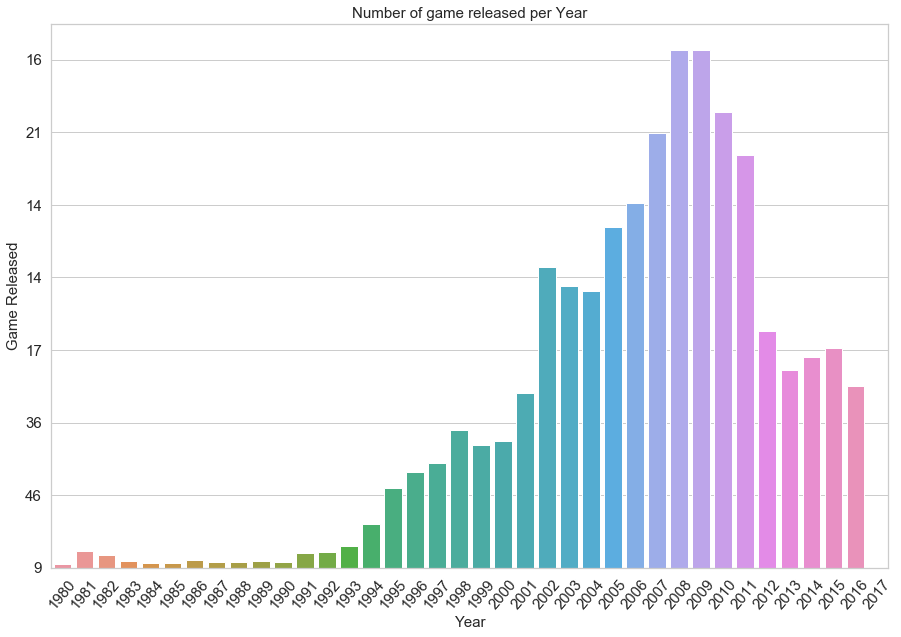

In [35]:
''''we use count to get the number of 
games that were developed unlike in the previous 
graph we used sum to get the total number'''

# creating a graph to see the total number of games that were developed per year.
y = sales_df.groupby(['Year_of_Release']).count()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(15,10))
#we are creaating a horizontal bar graph.
ax2 = sns.barplot(x=x, y=y, orient='v')
ax2.set_ylabel(ylabel='Game Released', fontsize=15)
ax2.set_xlabel(xlabel='Year', fontsize=15)
ax2.set_xticklabels(labels=x, fontsize=15, rotation=50)
ax2.set_yticklabels(labels=y, fontsize=15, rotation=0)
ax2.set_title('Number of game released per Year', fontsize=15)
plt.show()

- From the chart above we can see that there is an increase in the production of the game from the year 1995 and then gradually increasing through 2009 and stablizing at 2010. The production drops after 2010.

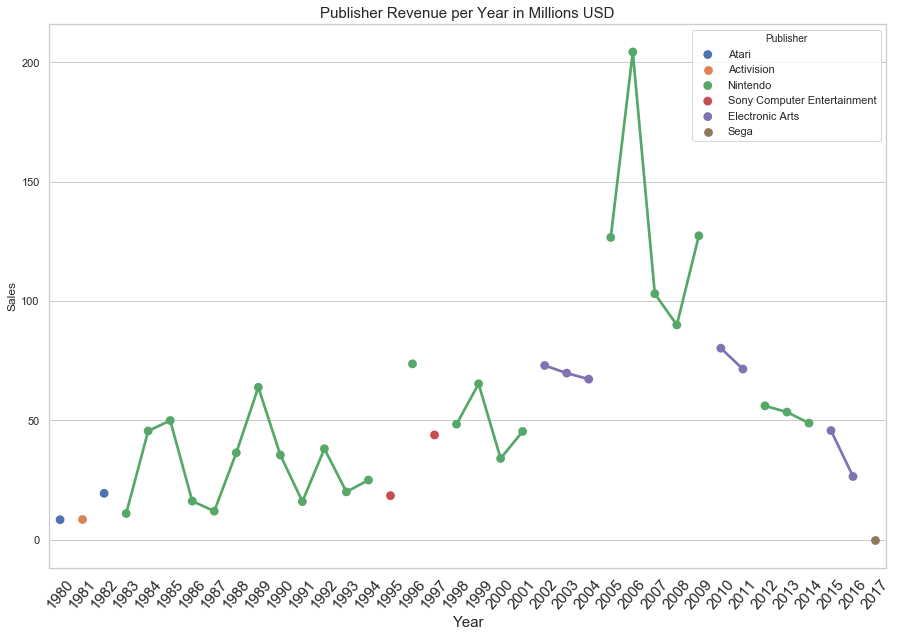

In [32]:
# creating a graph for revenue per publisher per year.
# we are going to pivot the table
pivot_publisher = sales_df.pivot_table('Global_Sales', index='Publisher',columns='Year_of_Release', aggfunc='sum')
# idxmax fetches the index of the max value in publisher
publishermax = pivot_publisher.idxmax(axis=0)
salemax = pivot_publisher.max()
years = pivot_publisher.columns.astype(int)
df = pd.concat([publishermax,salemax], axis=1)
df.columns = ['Publisher', 'Sales']

plt.figure(figsize=(15,10))
ax = sns.pointplot(x=years, y='Sales', hue='Publisher', data=df, size=15)
ax.set_title('Publisher Revenue per Year in Millions USD', fontsize=15)
ax.set_xlabel(xlabel='Year', fontsize=15)
ax.set_xticklabels(labels=years, fontsize=15, rotation=50)
ax.set_ylabel(ylabel='Sales')
plt.show()

- Just by looking at the graph above we can see that the market has been in favor of Nintendo, as they are having great global sales figures, overall when compared to its competitors.


Text(0.5,1,'Revenue by Genre per Year in Millions (USD)')

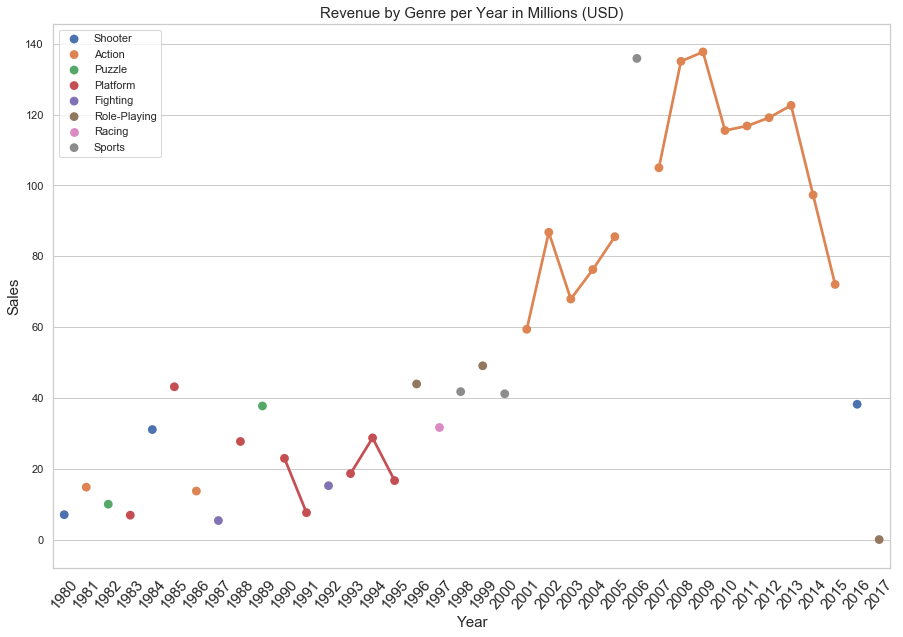

In [49]:
# creating a graph that shows the revenue per genre per year
pivot_genre = sales_df.pivot_table('Global_Sales', index='Genre', columns='Year_of_Release', aggfunc='sum')
genremax = pivot_genre.idxmax(axis=0)
salesmax = pivot_genre.max()
years = pivot_genre.columns.astype(int)
df = pd.concat([genremax,salesmax], axis=1)
df.columns = ['Genre','Sales']


plt.figure(figsize=(15,10))
ax = sns.pointplot(x=years, y='Sales', data=df, hue=genremax, size=15 )
ax.set_xlabel(xlabel='Year', fontsize=15)
ax.set_xticklabels(labels=years, fontsize=15, rotation=50)
ax.set_ylabel(ylabel='Sales', fontsize=15)
ax.set_title('Revenue by Genre per Year in Millions (USD)', fontsize=15)

- In the graph above we can see that the Acction games have been in popular demand.Based on Global sales figures.

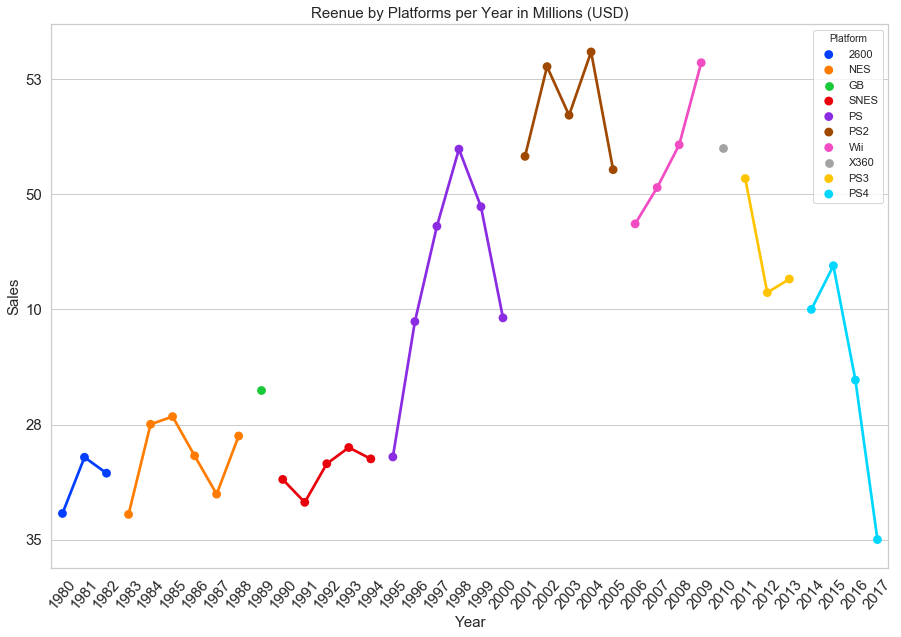

In [62]:
pivot_platform = sales_df.pivot_table('Global_Sales', index = 'Platform', columns='Year_of_Release', aggfunc='sum')
platformmax = pivot_platform.idxmax(axis=0)
salesmax = pivot_platform.max()
years = pivot_platform.columns.astype(int)
df = pd.concat([platformmax,salesmax],axis=1)
df.columns = ['Platform','Sales']

plt.figure(figsize=(15,10))
ax = sns.pointplot(x=years, y='Sales', data=df, palette='bright', hue='Platform', size=15)
ax.set_xlabel(xlabel='Year', fontsize=15)
ax.set_ylabel(ylabel='Sales',fontsize=15)
ax.set_title('Reenue by Platforms per Year in Millions (USD)', fontsize=15)
ax.set_xticklabels(labels=years, fontsize=15, rotation=50)
ax.set_yticklabels(labels=df['Sales'].astype(int), fontsize=15)
plt.show()